# A Complete EDA on Terrorism

##### Import all the libraries useful for performing mathematical, file and data visualisation operations

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#### Read the CSV file with given encoding

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "latin1")

##### Print the first 5 rows

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Get the number of Rows and Columns in the dataset

In [4]:
df.shape

(181691, 135)

#### Rename the column names appropriately

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType',
                       'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'TargetType','weaptype1_txt':'WeaponType','motive':'Motive'},inplace = True)

#### Dataset to include only specific columns

In [6]:
df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Group',
                 'Target','Summary','TargetType','WeaponType','Motive']]
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Group,Target,Summary,TargetType,WeaponType,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,NaN,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",NaN,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,NaN,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,NaN,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,NaN,Government (Diplomatic),Incendiary,NaN


In [7]:
df.columns = df.columns.str.capitalize() #Capitlaize the column name for better view

In [8]:
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attacktype,Killed,Wounded,Group,Target,Summary,Targettype,Weapontype,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,NaN,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",NaN,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,NaN,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,NaN,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,NaN,Government (Diplomatic),Incendiary,NaN


In [9]:
df.info()  #get the info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Latitude    177135 non-null  float64
 8   Longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  Killed      171378 non-null  float64
 11  Wounded     165380 non-null  float64
 12  Group       181691 non-null  object 
 13  Target      181055 non-null  object 
 14  Summary     115562 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapontype  181691 non-null  object 
 17  Motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [10]:
df.isnull().sum()/df.shape[0]*100  #get the percentage of null values in the dataset

Year           0.000000
Month          0.000000
Day            0.000000
Country        0.000000
State          0.231712
Region         0.000000
City           0.238867
Latitude       2.507554
Longitude      2.508104
Attacktype     0.000000
Killed         5.676120
Wounded        8.977330
Group          0.000000
Target         0.350045
Summary       36.396409
Targettype     0.000000
Weapontype     0.000000
Motive        72.171984
dtype: float64

#### Since Motive column has 72% of null data. We will drop it

In [11]:
df.drop("Motive",axis=1, inplace=True)
df.shape

(181691, 17)

#### To check the number of unique elements in each column

In [12]:
df.nunique()/df.shape[0]*100

Year           0.025868
Month          0.007155
Day            0.017612
Country        0.112829
State          1.571349
Region         0.006605
City          20.184819
Latitude      26.595704
Longitude     26.439945
Attacktype     0.004953
Killed         0.112829
Wounded        0.130992
Group          1.946712
Target        47.336412
Summary       61.913909
Targettype     0.012108
Weapontype     0.006605
dtype: float64

#### Drop the Summary column

In [13]:
df.drop("Summary", axis=1, inplace=True)

In [14]:
df.shape

(181691, 16)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Latitude    177135 non-null  float64
 8   Longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  Killed      171378 non-null  float64
 11  Wounded     165380 non-null  float64
 12  Group       181691 non-null  object 
 13  Target      181055 non-null  object 
 14  Targettype  181691 non-null  object 
 15  Weapontype  181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


In [16]:
#Code to check the value counts of each column
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("-------------------------------------------------")

Year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64
-------------------------------------------------
Month
5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64
-------------------------------------------------
Day
15    6500
1     634

In [17]:
df.isnull().sum()/df.shape[0]*100  #check percentage of null values 

Year          0.000000
Month         0.000000
Day           0.000000
Country       0.000000
State         0.231712
Region        0.000000
City          0.238867
Latitude      2.507554
Longitude     2.508104
Attacktype    0.000000
Killed        5.676120
Wounded       8.977330
Group         0.000000
Target        0.350045
Targettype    0.000000
Weapontype    0.000000
dtype: float64

#### Since this is a sensitive information dataset, we chose to drop the rows with null values in them

In [18]:
df = df.dropna()

In [19]:
df = df.reset_index(drop=True)

In [20]:
df.shape

(159570, 16)

In [21]:
df.isnull().sum()/df.shape[0]*100

Year          0.0
Month         0.0
Day           0.0
Country       0.0
State         0.0
Region        0.0
City          0.0
Latitude      0.0
Longitude     0.0
Attacktype    0.0
Killed        0.0
Wounded       0.0
Group         0.0
Target        0.0
Targettype    0.0
Weapontype    0.0
dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159570 entries, 0 to 159569
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        159570 non-null  int64  
 1   Month       159570 non-null  int64  
 2   Day         159570 non-null  int64  
 3   Country     159570 non-null  object 
 4   State       159570 non-null  object 
 5   Region      159570 non-null  object 
 6   City        159570 non-null  object 
 7   Latitude    159570 non-null  float64
 8   Longitude   159570 non-null  float64
 9   Attacktype  159570 non-null  object 
 10  Killed      159570 non-null  float64
 11  Wounded     159570 non-null  float64
 12  Group       159570 non-null  object 
 13  Target      159570 non-null  object 
 14  Targettype  159570 non-null  object 
 15  Weapontype  159570 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 19.5+ MB


In [23]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,159570.000000,159570.000000,159570.000000,159570.000000,1.595700e+05,159570.000000,159570.000000
mean,2003.508398,6.487391,15.528000,23.700442,-5.100348e+02,2.092361,3.199568
std,12.711726,3.387246,8.802103,18.302237,2.157549e+05,9.763436,36.551306
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,11.840929,8.663381e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.569021,4.378420e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.621521,6.914701e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000


## Data Analysis

In [24]:
#Code to print the most attacks based on different category
l = ["Country", "City", "Region","Year", "Month", "Group","Attacktype"]
for i in l:
    print(i+" - most attacks :", df[i].value_counts().idxmax())
    print("---------------------------------------------------------------------")

Country - most attacks : Iraq
---------------------------------------------------------------------
City - most attacks : Baghdad
---------------------------------------------------------------------
Region - most attacks : Middle East & North Africa
---------------------------------------------------------------------
Year - most attacks : 2014
---------------------------------------------------------------------
Month - most attacks : 5
---------------------------------------------------------------------
Group - most attacks : Unknown
---------------------------------------------------------------------
Attacktype - most attacks : Bombing/Explosion
---------------------------------------------------------------------


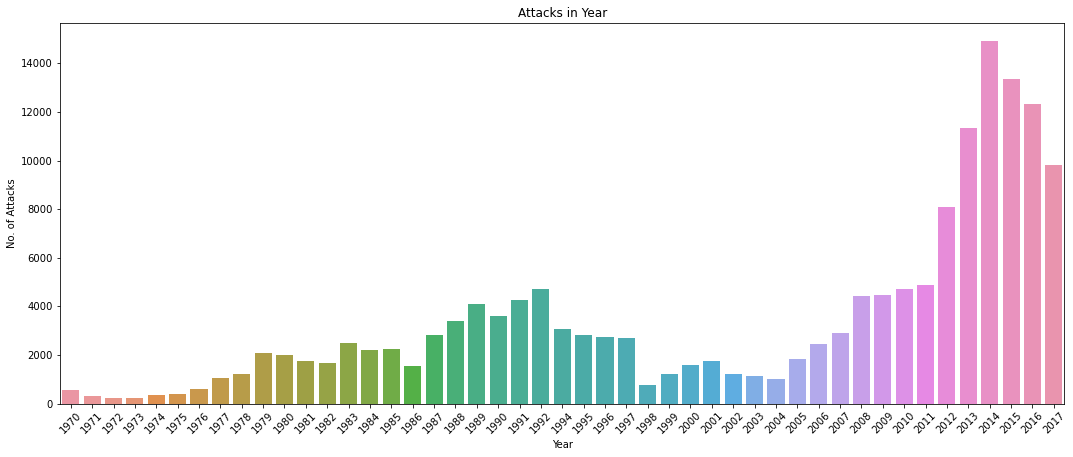

In [25]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize=(18,7))
sns.barplot(x = x_year,y = y_count_years)
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('No. of Attacks')
plt.title('Attacks in Year')
plt.show()

### Clearly the number of terrorist activities have gone up sharply after 2000.

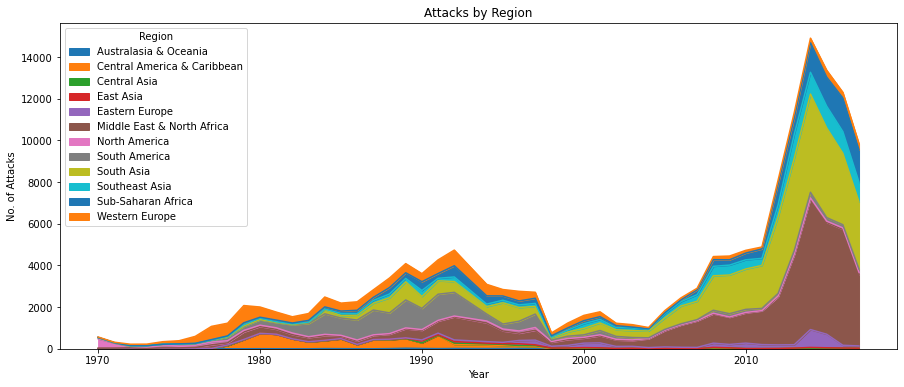

In [26]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Attacks by Region')
plt.ylabel('No. of Attacks')
plt.show()

### There is a sharp increase after 2010 and also an increase from the years 1980-2000

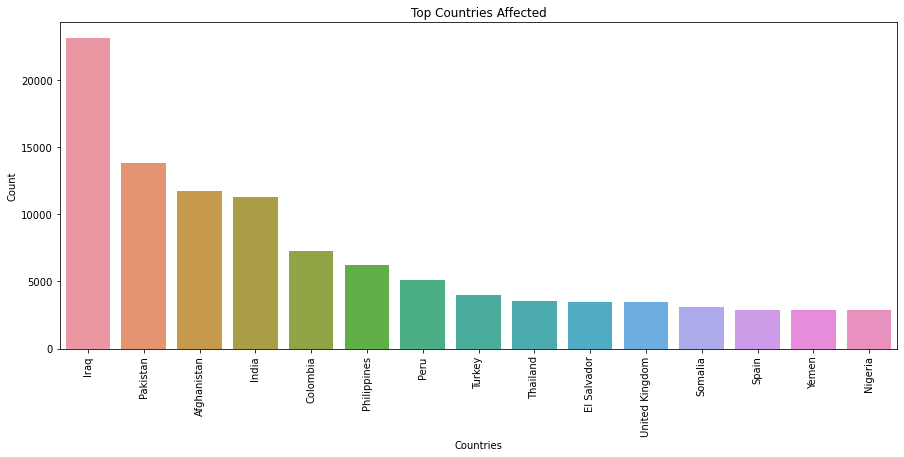

In [27]:
plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### We can see the top 15 countries affected

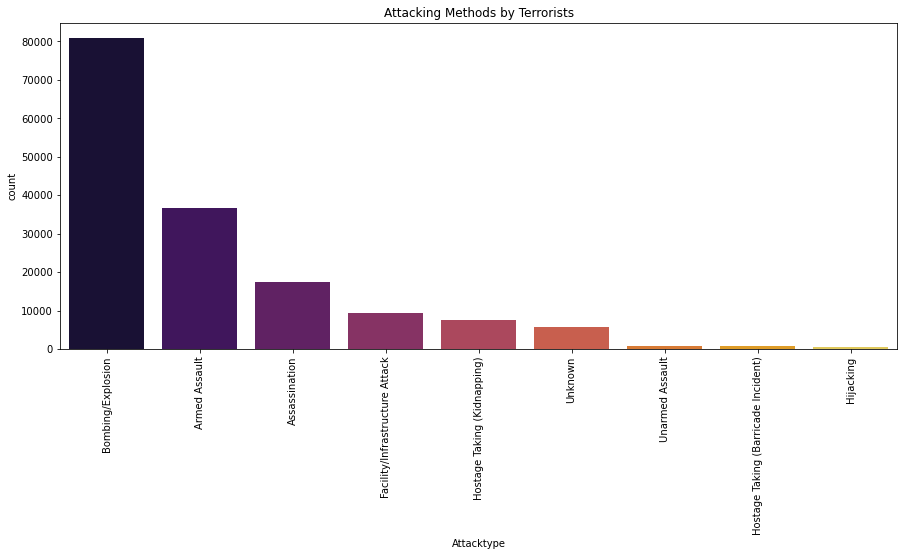

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot('Attacktype',data=df,palette='inferno',order=df['Attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

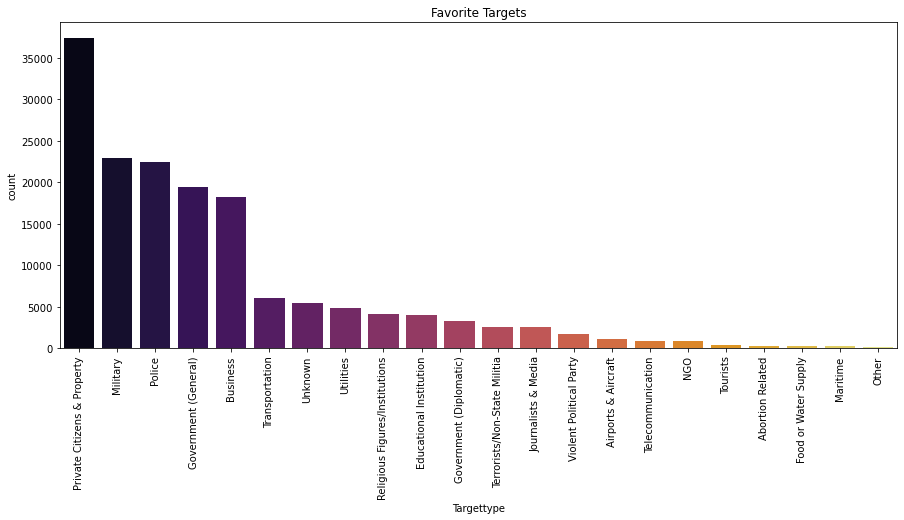

In [29]:
plt.subplots(figsize=(15,6))
sns.countplot(df['Targettype'],palette='inferno',order=df['Targettype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

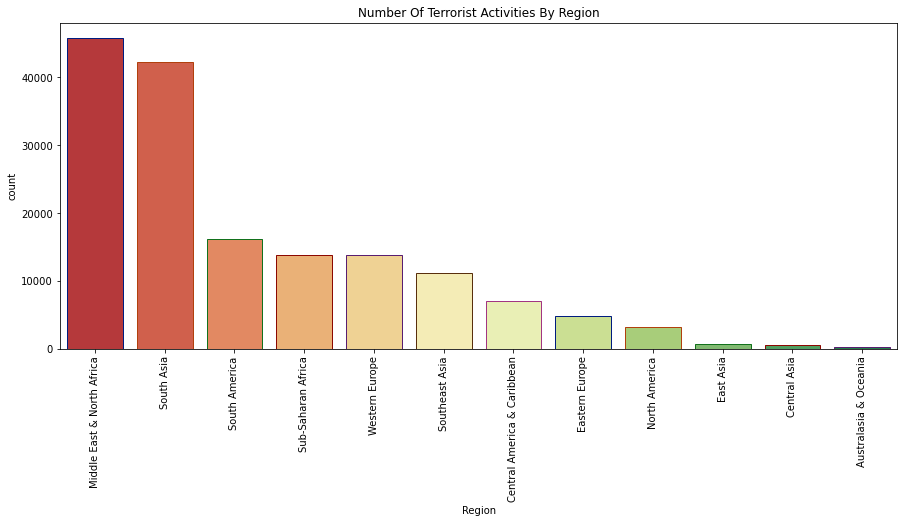

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

### Middle East and North Africa are the most terrorism prone regions followed by South Asia. The Australian Region have experienced very few terrorist events. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks

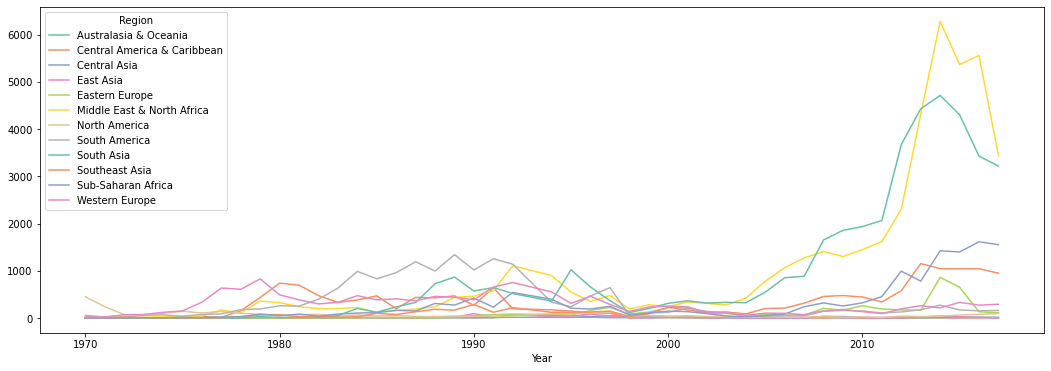

In [31]:
df_region=pd.crosstab(df.Year,df.Region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### Middle-East,North Africa,South Asia have seen a shoot in the number of terrorist activities over the years.

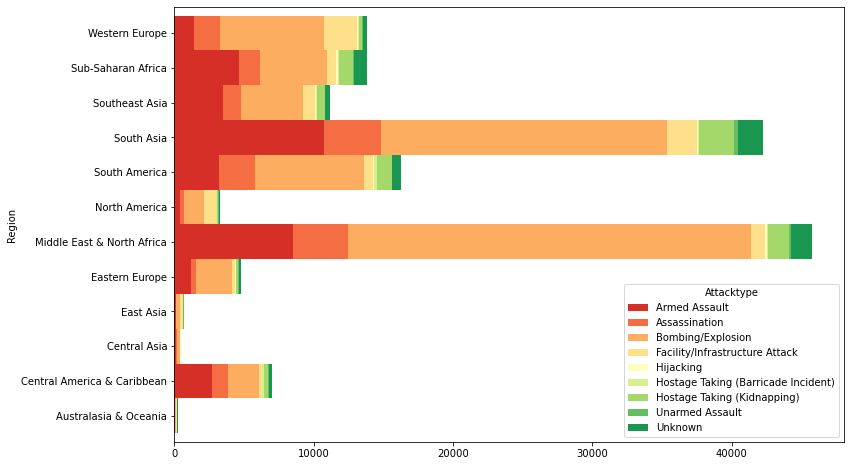

In [32]:
pd.crosstab(df.Region,df.Attacktype).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### Bombing and Armed assaults, as seen above are the most prominent types of Attack irrespective of Regions.

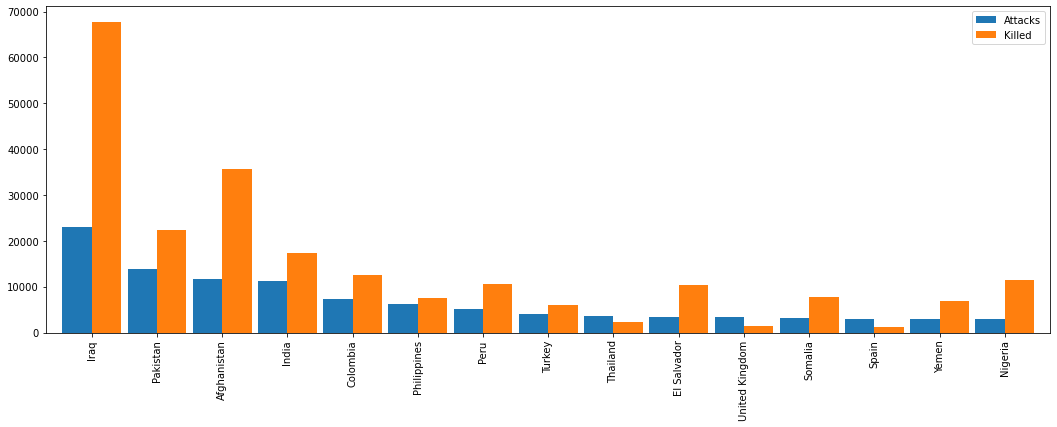

In [33]:
df_terror=df['Country'].value_counts()[:15].to_frame()
df_terror.columns=['Attacks']
df_kill=df.groupby('Country')['Killed'].sum().to_frame()
df_terror.merge(df_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### The number of killed is almost 3 folds more than attacks for Iraq. And a similar pattern is observed in Afghanistan

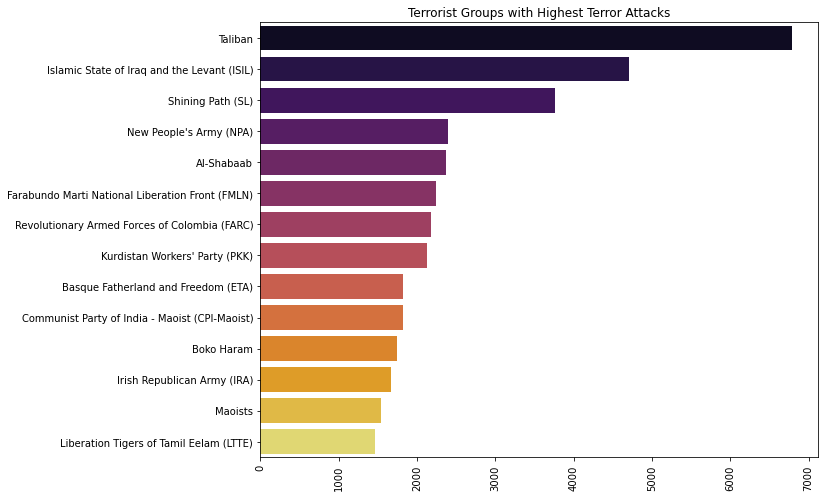

In [34]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

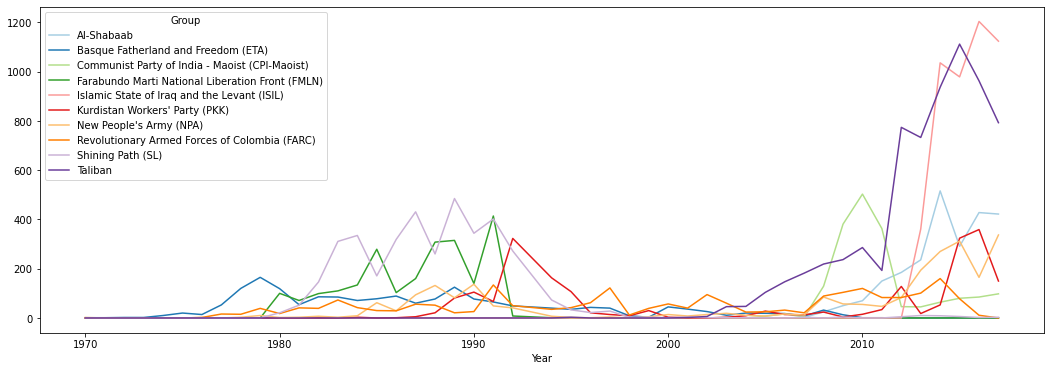

In [35]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

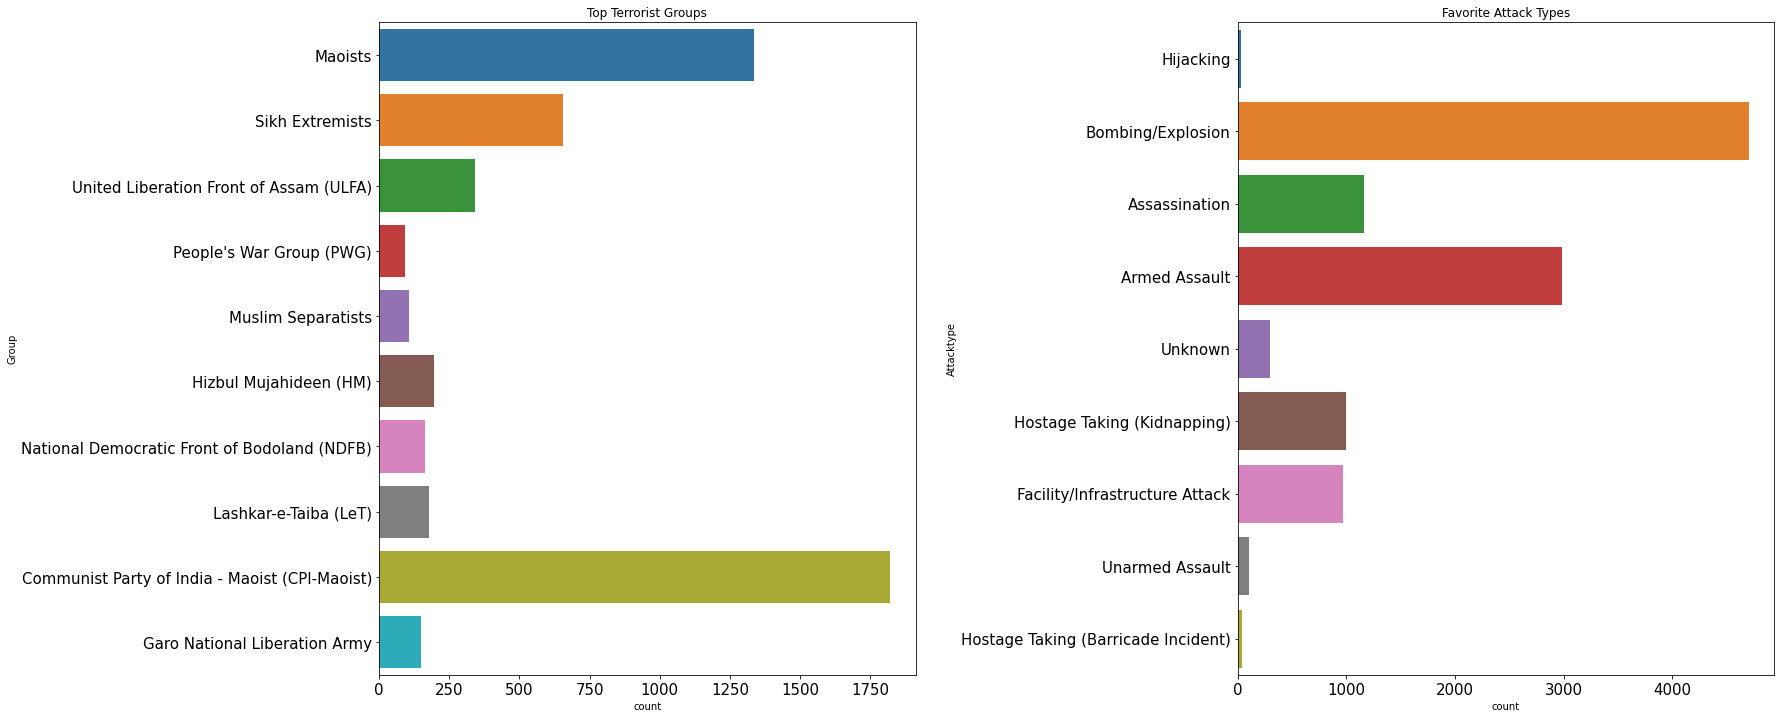

In [36]:
terror_india=df[df['Country']=='India']

f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='Attacktype',data=terror_india,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

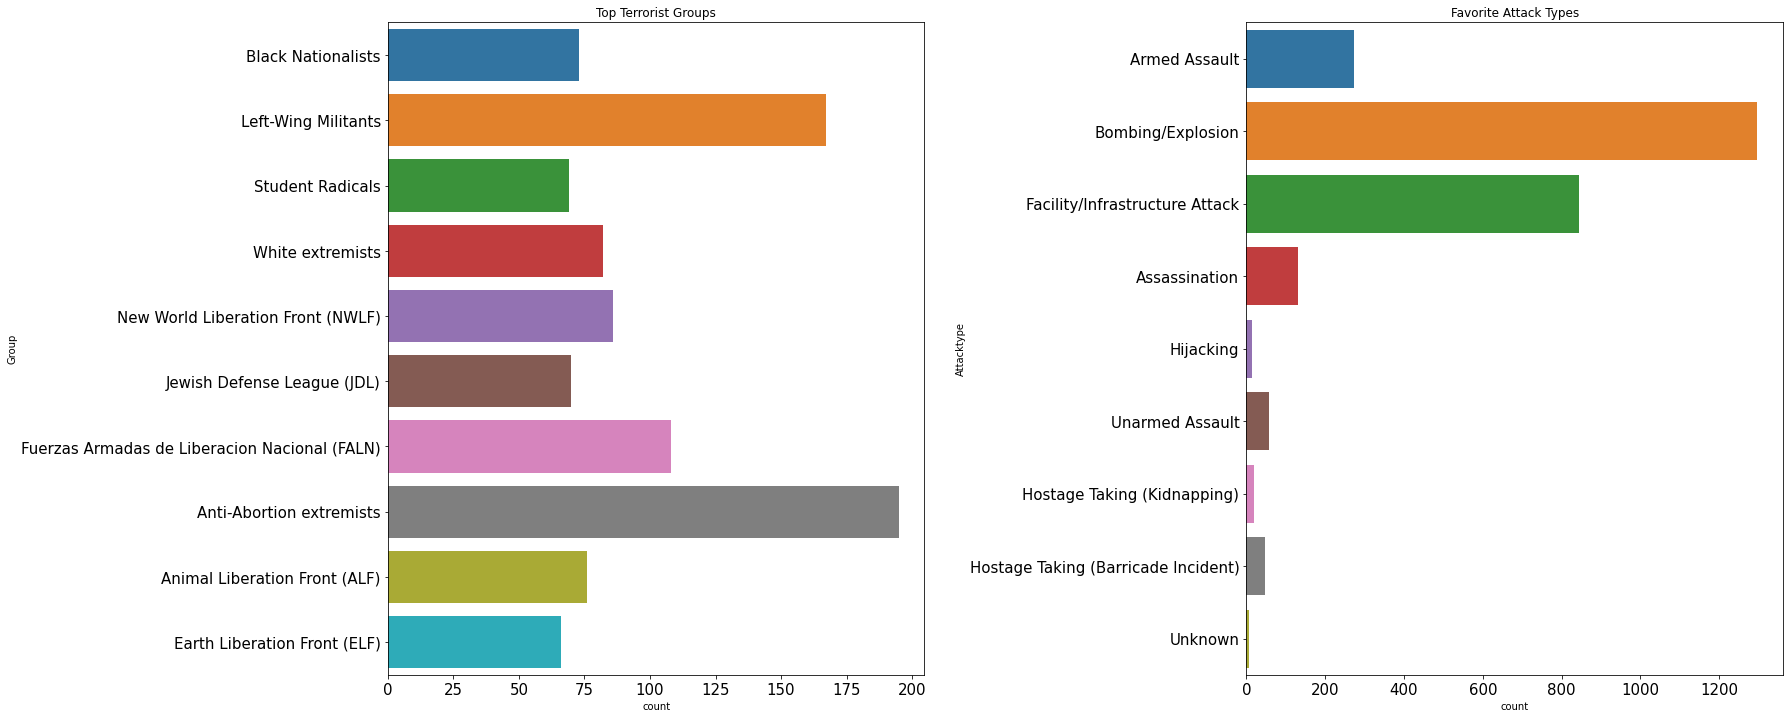

In [37]:
terror_usa=df[df['Country']=='United States']


f,ax=plt.subplots(1,2,figsize=(25,12))
usa_groups=terror_usa['Group'].value_counts()[1:11].index
usa_groups=terror_usa[terror_usa['Group'].isin(usa_groups)]
sns.countplot(y='Group',data=usa_groups,ax=ax[0])
sns.countplot(y='Attacktype',data=terror_usa,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

# Conclusion

It is visible that the Middle-East and Southern-Asia are the regions with highest terrorist activites, not only in numbers, but also in casualities. It is spreading largely across the globe but in the past few years, India, Pakistan and Afghanistan have witnessed an increase in such number of activities.

----------------------------------------EOF---------------------------------------------------